# Before Convolutional Neural Network

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import random as rd

from sklearn.metrics import accuracy_score

### 데이터를 불러옵시다.

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 40s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 9325
다음 그림은 Frog 입니다.


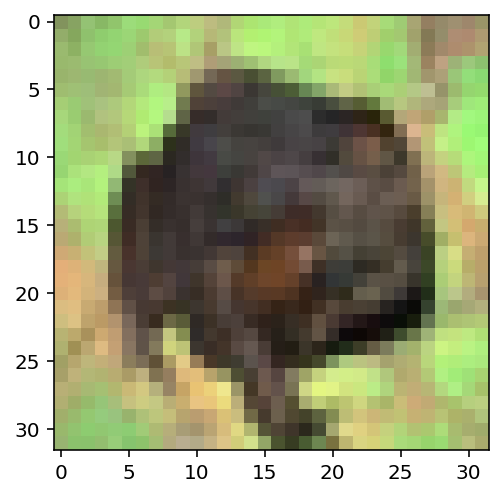

In [7]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [8]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [13]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

* scaling

In [15]:
max_n, min_n = train_x.max(), train_x.min()

max_n, min_n

(255, 0)

In [16]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [17]:
train_x.max(), train_x.min()

(1.0, 0.0)

* One-Hot Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

In [22]:
class_n = len(np.unique(train_y))
class_n

10

In [23]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [25]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

In [26]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

In [27]:
#############
# Your Code # : Functional API
#############
# 1 세션 클리어 
clear_session()

# 2 레이어 엮기
il = Input(shape=(32,32,3))
fl = Flatten()(il)
hl = Dense(512, activation='relu')(fl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(256, activation='relu')(hl)
hl = Dense(128, activation='relu')(hl)
ol = Dense(10, activation='softmax')(hl)

# 3 모델 시작 끝 지정
model = Model(il, ol)

# 4 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290  

In [28]:
#############
# Your Code # Early Stopping
#############
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [30]:
#############
# Your Code #
#############
history = model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
                    epochs=50, verbose=1)

Epoch 1/50
1250/1250 [==============================] - 8s 4ms/step - loss: 1.8954 - accuracy: 0.3068 - val_loss: 1.7791 - val_accuracy: 0.3689
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7122 - accuracy: 0.3835 - val_loss: 1.6731 - val_accuracy: 0.3990
Epoch 3/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6294 - accuracy: 0.4150 - val_loss: 1.6289 - val_accuracy: 0.4230
Epoch 4/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5781 - accuracy: 0.4341 - val_loss: 1.6042 - val_accuracy: 0.4247
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5358 - accuracy: 0.4514 - val_loss: 1.5767 - val_accuracy: 0.4357
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5003 - accuracy: 0.4578 - val_loss: 1.5834 - val_accuracy: 0.4375
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4730 - accuracy: 0.4729 - val_loss: 1.5741 - val_accuracy:



---



In [32]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.4881 - accuracy: 0.4862
Test Loss : 1.488087,  Test Accuracy : 48.620%


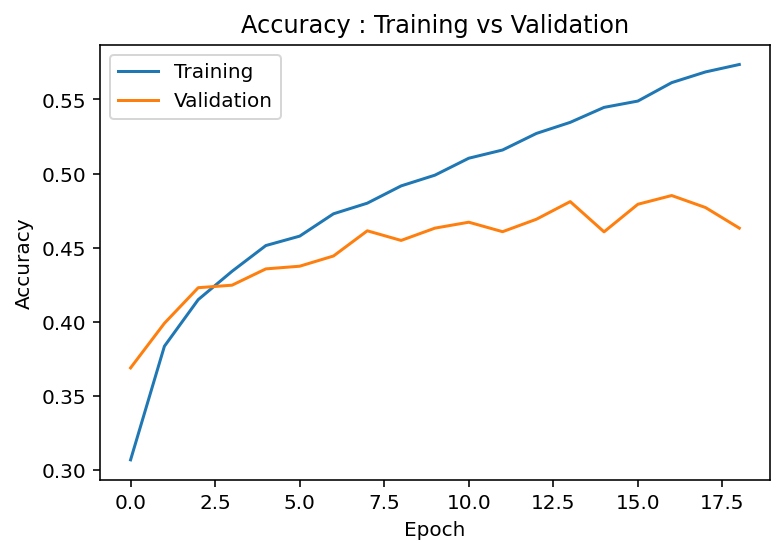

In [33]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

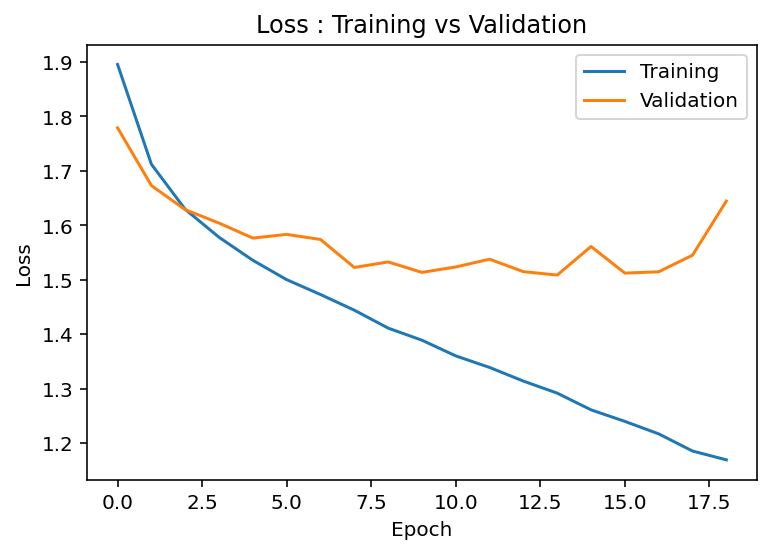

In [34]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [35]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 54.70%
테스트 정확도 : 48.62%


id = 9505
다음 그림은 Cat 입니다.
모델의 예측 : Horse
모델의 카테고리별 확률 : 
{'Airplane': 1.0, 'Automobile': 0.0, 'Bird': 11.0, 'Cat': 6.0, 'Deer': 19.0, 'Dog': 14.0, 'Frog': 4.0, 'Horse': 38.0, 'Ship': 0.0, 'Truck': 2.0}
틀렸어요


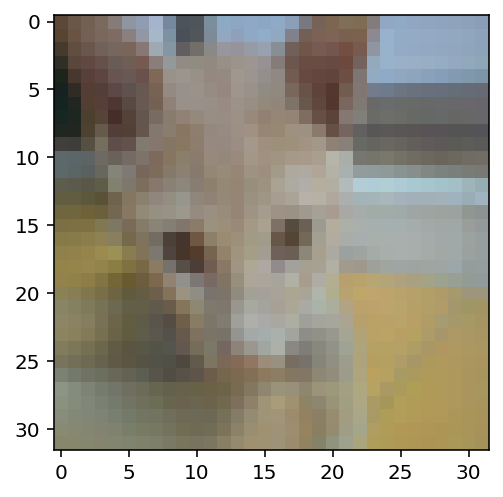

In [41]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()